In [2]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import scipy

In [3]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Slices/20190526_slices/201910/wfl/' #master folder
protein="TNR" #TNR,Agg,WFA,HABP

In [4]:
results = {"filename":[],
          "exp condition":[],
          "ecmchannelno":[]
          }
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if ("save" in str(filelist[i]))==True:
            if filelist[i].endswith(".tif"): 
                if str(filelist[i][:-12]) not in str(results["filename"]):

                    results["filename"].append(filelist[i][:-15])
                    results["exp condition"].append(filelist[i][:-15].split('/')[-4])
                    #channeldir="/".join(filelist[i][:-12].split("/")[:-2])
                    #exec(open(channeldir+"/channels.txt").read())
                    results["ecmchannelno"].append(1)



In [5]:
results["filename"][0].split('save')[0]+results["filename"][0].split('/')[-1]

'/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Slices/20190526_slices/201910/wfl/20191019_wfl647_mouse611_02/sted/20191019_wfl647_mouse611_02_Series10.tif'

In [6]:
results["TNR spots mask"]=[]
for i in range(0,len(results["filename"])):
    results["TNR spots mask"].append(np.nan)
for mask in range(0,len(results["filename"])):
    ecm_channel_no=results["ecmchannelno"][mask]
    file_nametnr=results["filename"][mask]+'.roi.binary.tif'

    tnrmask=cv2.imread(file_nametnr)
    results["TNR spots mask"][mask]=tnrmask


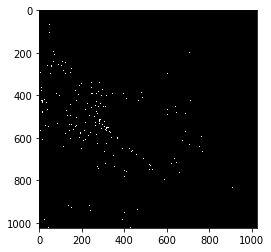

In [7]:
plt.imshow(results["TNR spots mask"][10])



## get icy spots

In [12]:
## make spots dictionaries
ecm_spots_results={"filename":[],
               "exp condition":[],
               "spotno":[],
                   "centroid":[],
                   "weighted centroid":[],
                   "size":[],
                   "mean_intensity":[],
               "distance to nearest centroid":[],
                   "distance to nearest weighted centroid":[],
                   "perimeter":[]
                 
                  }

for image in range(0,len(results["filename"])):
    print('Calculating image no ' + str(image+1) + ' out of' + str(len(results["filename"])))
    #read masks
    original_image_name=results["filename"][0].split('save')[0]+results["filename"][0].split('/')[-1]
    original_image=pims.open(original_image_name)[0]
    ecm_image=results["TNR spots mask"][image][:,:,0]
    #label masks
    labeled_ecm=label(ecm_image)
    #props
    regionprops_ecm=regionprops(labeled_ecm,intensity_image=original_image)
    #get params from props
    for i in range(0,len(regionprops_ecm)):
        ecm_spots_results["filename"].append(results["filename"][image])
        ecm_spots_results["exp condition"].append(results["exp condition"][image])
        ecm_spots_results["spotno"].append(i)
        ecm_spots_results["centroid"].append(regionprops_ecm[i]['centroid'])
        ecm_spots_results["weighted centroid"].append(regionprops_ecm[i]['weighted_centroid'])
        ecm_spots_results["size"].append(regionprops_ecm[i]['area'])
        ecm_spots_results["mean_intensity"].append(regionprops_ecm[i]['mean_intensity'])
        ecm_spots_results["perimeter"].append(regionprops_ecm[i]['perimeter'])
        

TiffPages: invalid page offset (1058616)


Calculating image no 1 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 2 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 3 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 4 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 5 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 6 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 7 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 8 out of47
Calculating image no 9 out of47


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 10 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 11 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 12 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 13 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 14 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 15 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 16 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 17 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 18 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 19 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 20 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 21 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 22 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 23 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 24 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 25 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 26 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 27 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 28 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 29 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 30 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 31 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 32 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 33 out of47
Calculating image no 34 out of47


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 35 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 36 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 37 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 38 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 39 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 40 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 41 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 42 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 43 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 44 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 45 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 46 out of47


TiffPages: invalid page offset (1058616)


Calculating image no 47 out of47


In [13]:
ecm_spots_results_todf=deepcopy(ecm_spots_results)
#del(ecm_spots_results["distance to nearest centroid"])

#ecm_spots_results["distance to nearest centroid"]=[]
#df_ecmspots=pd.DataFrame(ecm_spots_results_todf)

for i in range(0,len(ecm_spots_results["filename"])):
    image_id=ecm_spots_results["filename"][i]
    #funcat_slice=df_funcatspots[df_funcatspots["filename"]==image_id]
    print(str(i+1)+' out of ' + str(len(ecm_spots_results["filename"])))
    a=scipy.spatial.distance.cdist([ecm_spots_results["centroid"][i]],
                                         ecm_spots_results["centroid"],'euclidean')[0]
    minval = np.min(a[np.nonzero(a)])
    ecm_spots_results["distance to nearest centroid"].append(minval)
    
    a=scipy.spatial.distance.cdist([ecm_spots_results["weighted centroid"][i]],
                                         ecm_spots_results["weighted centroid"],'euclidean')[0]
    minval = np.min(a[np.nonzero(a)])
    ecm_spots_results["distance to nearest weighted centroid"].append(minval)

    


1 out of 30306
2 out of 30306
3 out of 30306
4 out of 30306
5 out of 30306
6 out of 30306
7 out of 30306
8 out of 30306
9 out of 30306
10 out of 30306
11 out of 30306
12 out of 30306
13 out of 30306
14 out of 30306
15 out of 30306
16 out of 30306
17 out of 30306
18 out of 30306
19 out of 30306
20 out of 30306
21 out of 30306
22 out of 30306
23 out of 30306
24 out of 30306
25 out of 30306
26 out of 30306
27 out of 30306
28 out of 30306
29 out of 30306
30 out of 30306
31 out of 30306
32 out of 30306
33 out of 30306
34 out of 30306
35 out of 30306
36 out of 30306
37 out of 30306
38 out of 30306
39 out of 30306
40 out of 30306
41 out of 30306
42 out of 30306
43 out of 30306
44 out of 30306
45 out of 30306
46 out of 30306
47 out of 30306
48 out of 30306
49 out of 30306
50 out of 30306
51 out of 30306
52 out of 30306
53 out of 30306
54 out of 30306
55 out of 30306
56 out of 30306
57 out of 30306
58 out of 30306
59 out of 30306
60 out of 30306
61 out of 30306
62 out of 30306
63 out of 30306
6

495 out of 30306
496 out of 30306
497 out of 30306
498 out of 30306
499 out of 30306
500 out of 30306
501 out of 30306
502 out of 30306
503 out of 30306
504 out of 30306
505 out of 30306
506 out of 30306
507 out of 30306
508 out of 30306
509 out of 30306
510 out of 30306
511 out of 30306
512 out of 30306
513 out of 30306
514 out of 30306
515 out of 30306
516 out of 30306
517 out of 30306
518 out of 30306
519 out of 30306
520 out of 30306
521 out of 30306
522 out of 30306
523 out of 30306
524 out of 30306
525 out of 30306
526 out of 30306
527 out of 30306
528 out of 30306
529 out of 30306
530 out of 30306
531 out of 30306
532 out of 30306
533 out of 30306
534 out of 30306
535 out of 30306
536 out of 30306
537 out of 30306
538 out of 30306
539 out of 30306
540 out of 30306
541 out of 30306
542 out of 30306
543 out of 30306
544 out of 30306
545 out of 30306
546 out of 30306
547 out of 30306
548 out of 30306
549 out of 30306
550 out of 30306
551 out of 30306
552 out of 30306
553 out of 303

979 out of 30306
980 out of 30306
981 out of 30306
982 out of 30306
983 out of 30306
984 out of 30306
985 out of 30306
986 out of 30306
987 out of 30306
988 out of 30306
989 out of 30306
990 out of 30306
991 out of 30306
992 out of 30306
993 out of 30306
994 out of 30306
995 out of 30306
996 out of 30306
997 out of 30306
998 out of 30306
999 out of 30306
1000 out of 30306
1001 out of 30306
1002 out of 30306
1003 out of 30306
1004 out of 30306
1005 out of 30306
1006 out of 30306
1007 out of 30306
1008 out of 30306
1009 out of 30306
1010 out of 30306
1011 out of 30306
1012 out of 30306
1013 out of 30306
1014 out of 30306
1015 out of 30306
1016 out of 30306
1017 out of 30306
1018 out of 30306
1019 out of 30306
1020 out of 30306
1021 out of 30306
1022 out of 30306
1023 out of 30306
1024 out of 30306
1025 out of 30306
1026 out of 30306
1027 out of 30306
1028 out of 30306
1029 out of 30306
1030 out of 30306
1031 out of 30306
1032 out of 30306
1033 out of 30306
1034 out of 30306
1035 out of 3

1439 out of 30306
1440 out of 30306
1441 out of 30306
1442 out of 30306
1443 out of 30306
1444 out of 30306
1445 out of 30306
1446 out of 30306
1447 out of 30306
1448 out of 30306
1449 out of 30306
1450 out of 30306
1451 out of 30306
1452 out of 30306
1453 out of 30306
1454 out of 30306
1455 out of 30306
1456 out of 30306
1457 out of 30306
1458 out of 30306
1459 out of 30306
1460 out of 30306
1461 out of 30306
1462 out of 30306
1463 out of 30306
1464 out of 30306
1465 out of 30306
1466 out of 30306
1467 out of 30306
1468 out of 30306
1469 out of 30306
1470 out of 30306
1471 out of 30306
1472 out of 30306
1473 out of 30306
1474 out of 30306
1475 out of 30306
1476 out of 30306
1477 out of 30306
1478 out of 30306
1479 out of 30306
1480 out of 30306
1481 out of 30306
1482 out of 30306
1483 out of 30306
1484 out of 30306
1485 out of 30306
1486 out of 30306
1487 out of 30306
1488 out of 30306
1489 out of 30306
1490 out of 30306
1491 out of 30306
1492 out of 30306
1493 out of 30306
1494 out o

1897 out of 30306
1898 out of 30306
1899 out of 30306
1900 out of 30306
1901 out of 30306
1902 out of 30306
1903 out of 30306
1904 out of 30306
1905 out of 30306
1906 out of 30306
1907 out of 30306
1908 out of 30306
1909 out of 30306
1910 out of 30306
1911 out of 30306
1912 out of 30306
1913 out of 30306
1914 out of 30306
1915 out of 30306
1916 out of 30306
1917 out of 30306
1918 out of 30306
1919 out of 30306
1920 out of 30306
1921 out of 30306
1922 out of 30306
1923 out of 30306
1924 out of 30306
1925 out of 30306
1926 out of 30306
1927 out of 30306
1928 out of 30306
1929 out of 30306
1930 out of 30306
1931 out of 30306
1932 out of 30306
1933 out of 30306
1934 out of 30306
1935 out of 30306
1936 out of 30306
1937 out of 30306
1938 out of 30306
1939 out of 30306
1940 out of 30306
1941 out of 30306
1942 out of 30306
1943 out of 30306
1944 out of 30306
1945 out of 30306
1946 out of 30306
1947 out of 30306
1948 out of 30306
1949 out of 30306
1950 out of 30306
1951 out of 30306
1952 out o

2353 out of 30306
2354 out of 30306
2355 out of 30306
2356 out of 30306
2357 out of 30306
2358 out of 30306
2359 out of 30306
2360 out of 30306
2361 out of 30306
2362 out of 30306
2363 out of 30306
2364 out of 30306
2365 out of 30306
2366 out of 30306
2367 out of 30306
2368 out of 30306
2369 out of 30306
2370 out of 30306
2371 out of 30306
2372 out of 30306
2373 out of 30306
2374 out of 30306
2375 out of 30306
2376 out of 30306
2377 out of 30306
2378 out of 30306
2379 out of 30306
2380 out of 30306
2381 out of 30306
2382 out of 30306
2383 out of 30306
2384 out of 30306
2385 out of 30306
2386 out of 30306
2387 out of 30306
2388 out of 30306
2389 out of 30306
2390 out of 30306
2391 out of 30306
2392 out of 30306
2393 out of 30306
2394 out of 30306
2395 out of 30306
2396 out of 30306
2397 out of 30306
2398 out of 30306
2399 out of 30306
2400 out of 30306
2401 out of 30306
2402 out of 30306
2403 out of 30306
2404 out of 30306
2405 out of 30306
2406 out of 30306
2407 out of 30306
2408 out o

2814 out of 30306
2815 out of 30306
2816 out of 30306
2817 out of 30306
2818 out of 30306
2819 out of 30306
2820 out of 30306
2821 out of 30306
2822 out of 30306
2823 out of 30306
2824 out of 30306
2825 out of 30306
2826 out of 30306
2827 out of 30306
2828 out of 30306
2829 out of 30306
2830 out of 30306
2831 out of 30306
2832 out of 30306
2833 out of 30306
2834 out of 30306
2835 out of 30306
2836 out of 30306
2837 out of 30306
2838 out of 30306
2839 out of 30306
2840 out of 30306
2841 out of 30306
2842 out of 30306
2843 out of 30306
2844 out of 30306
2845 out of 30306
2846 out of 30306
2847 out of 30306
2848 out of 30306
2849 out of 30306
2850 out of 30306
2851 out of 30306
2852 out of 30306
2853 out of 30306
2854 out of 30306
2855 out of 30306
2856 out of 30306
2857 out of 30306
2858 out of 30306
2859 out of 30306
2860 out of 30306
2861 out of 30306
2862 out of 30306
2863 out of 30306
2864 out of 30306
2865 out of 30306
2866 out of 30306
2867 out of 30306
2868 out of 30306
2869 out o

3271 out of 30306
3272 out of 30306
3273 out of 30306
3274 out of 30306
3275 out of 30306
3276 out of 30306
3277 out of 30306
3278 out of 30306
3279 out of 30306
3280 out of 30306
3281 out of 30306
3282 out of 30306
3283 out of 30306
3284 out of 30306
3285 out of 30306
3286 out of 30306
3287 out of 30306
3288 out of 30306
3289 out of 30306
3290 out of 30306
3291 out of 30306
3292 out of 30306
3293 out of 30306
3294 out of 30306
3295 out of 30306
3296 out of 30306
3297 out of 30306
3298 out of 30306
3299 out of 30306
3300 out of 30306
3301 out of 30306
3302 out of 30306
3303 out of 30306
3304 out of 30306
3305 out of 30306
3306 out of 30306
3307 out of 30306
3308 out of 30306
3309 out of 30306
3310 out of 30306
3311 out of 30306
3312 out of 30306
3313 out of 30306
3314 out of 30306
3315 out of 30306
3316 out of 30306
3317 out of 30306
3318 out of 30306
3319 out of 30306
3320 out of 30306
3321 out of 30306
3322 out of 30306
3323 out of 30306
3324 out of 30306
3325 out of 30306
3326 out o

3727 out of 30306
3728 out of 30306
3729 out of 30306
3730 out of 30306
3731 out of 30306
3732 out of 30306
3733 out of 30306
3734 out of 30306
3735 out of 30306
3736 out of 30306
3737 out of 30306
3738 out of 30306
3739 out of 30306
3740 out of 30306
3741 out of 30306
3742 out of 30306
3743 out of 30306
3744 out of 30306
3745 out of 30306
3746 out of 30306
3747 out of 30306
3748 out of 30306
3749 out of 30306
3750 out of 30306
3751 out of 30306
3752 out of 30306
3753 out of 30306
3754 out of 30306
3755 out of 30306
3756 out of 30306
3757 out of 30306
3758 out of 30306
3759 out of 30306
3760 out of 30306
3761 out of 30306
3762 out of 30306
3763 out of 30306
3764 out of 30306
3765 out of 30306
3766 out of 30306
3767 out of 30306
3768 out of 30306
3769 out of 30306
3770 out of 30306
3771 out of 30306
3772 out of 30306
3773 out of 30306
3774 out of 30306
3775 out of 30306
3776 out of 30306
3777 out of 30306
3778 out of 30306
3779 out of 30306
3780 out of 30306
3781 out of 30306
3782 out o

4189 out of 30306
4190 out of 30306
4191 out of 30306
4192 out of 30306
4193 out of 30306
4194 out of 30306
4195 out of 30306
4196 out of 30306
4197 out of 30306
4198 out of 30306
4199 out of 30306
4200 out of 30306
4201 out of 30306
4202 out of 30306
4203 out of 30306
4204 out of 30306
4205 out of 30306
4206 out of 30306
4207 out of 30306
4208 out of 30306
4209 out of 30306
4210 out of 30306
4211 out of 30306
4212 out of 30306
4213 out of 30306
4214 out of 30306
4215 out of 30306
4216 out of 30306
4217 out of 30306
4218 out of 30306
4219 out of 30306
4220 out of 30306
4221 out of 30306
4222 out of 30306
4223 out of 30306
4224 out of 30306
4225 out of 30306
4226 out of 30306
4227 out of 30306
4228 out of 30306
4229 out of 30306
4230 out of 30306
4231 out of 30306
4232 out of 30306
4233 out of 30306
4234 out of 30306
4235 out of 30306
4236 out of 30306
4237 out of 30306
4238 out of 30306
4239 out of 30306
4240 out of 30306
4241 out of 30306
4242 out of 30306
4243 out of 30306
4244 out o

4647 out of 30306
4648 out of 30306
4649 out of 30306
4650 out of 30306
4651 out of 30306
4652 out of 30306
4653 out of 30306
4654 out of 30306
4655 out of 30306
4656 out of 30306
4657 out of 30306
4658 out of 30306
4659 out of 30306
4660 out of 30306
4661 out of 30306
4662 out of 30306
4663 out of 30306
4664 out of 30306
4665 out of 30306
4666 out of 30306
4667 out of 30306
4668 out of 30306
4669 out of 30306
4670 out of 30306
4671 out of 30306
4672 out of 30306
4673 out of 30306
4674 out of 30306
4675 out of 30306
4676 out of 30306
4677 out of 30306
4678 out of 30306
4679 out of 30306
4680 out of 30306
4681 out of 30306
4682 out of 30306
4683 out of 30306
4684 out of 30306
4685 out of 30306
4686 out of 30306
4687 out of 30306
4688 out of 30306
4689 out of 30306
4690 out of 30306
4691 out of 30306
4692 out of 30306
4693 out of 30306
4694 out of 30306
4695 out of 30306
4696 out of 30306
4697 out of 30306
4698 out of 30306
4699 out of 30306
4700 out of 30306
4701 out of 30306
4702 out o

5103 out of 30306
5104 out of 30306
5105 out of 30306
5106 out of 30306
5107 out of 30306
5108 out of 30306
5109 out of 30306
5110 out of 30306
5111 out of 30306
5112 out of 30306
5113 out of 30306
5114 out of 30306
5115 out of 30306
5116 out of 30306
5117 out of 30306
5118 out of 30306
5119 out of 30306
5120 out of 30306
5121 out of 30306
5122 out of 30306
5123 out of 30306
5124 out of 30306
5125 out of 30306
5126 out of 30306
5127 out of 30306
5128 out of 30306
5129 out of 30306
5130 out of 30306
5131 out of 30306
5132 out of 30306
5133 out of 30306
5134 out of 30306
5135 out of 30306
5136 out of 30306
5137 out of 30306
5138 out of 30306
5139 out of 30306
5140 out of 30306
5141 out of 30306
5142 out of 30306
5143 out of 30306
5144 out of 30306
5145 out of 30306
5146 out of 30306
5147 out of 30306
5148 out of 30306
5149 out of 30306
5150 out of 30306
5151 out of 30306
5152 out of 30306
5153 out of 30306
5154 out of 30306
5155 out of 30306
5156 out of 30306
5157 out of 30306
5158 out o

5563 out of 30306
5564 out of 30306
5565 out of 30306
5566 out of 30306
5567 out of 30306
5568 out of 30306
5569 out of 30306
5570 out of 30306
5571 out of 30306
5572 out of 30306
5573 out of 30306
5574 out of 30306
5575 out of 30306
5576 out of 30306
5577 out of 30306
5578 out of 30306
5579 out of 30306
5580 out of 30306
5581 out of 30306
5582 out of 30306
5583 out of 30306
5584 out of 30306
5585 out of 30306
5586 out of 30306
5587 out of 30306
5588 out of 30306
5589 out of 30306
5590 out of 30306
5591 out of 30306
5592 out of 30306
5593 out of 30306
5594 out of 30306
5595 out of 30306
5596 out of 30306
5597 out of 30306
5598 out of 30306
5599 out of 30306
5600 out of 30306
5601 out of 30306
5602 out of 30306
5603 out of 30306
5604 out of 30306
5605 out of 30306
5606 out of 30306
5607 out of 30306
5608 out of 30306
5609 out of 30306
5610 out of 30306
5611 out of 30306
5612 out of 30306
5613 out of 30306
5614 out of 30306
5615 out of 30306
5616 out of 30306
5617 out of 30306
5618 out o

6019 out of 30306
6020 out of 30306
6021 out of 30306
6022 out of 30306
6023 out of 30306
6024 out of 30306
6025 out of 30306
6026 out of 30306
6027 out of 30306
6028 out of 30306
6029 out of 30306
6030 out of 30306
6031 out of 30306
6032 out of 30306
6033 out of 30306
6034 out of 30306
6035 out of 30306
6036 out of 30306
6037 out of 30306
6038 out of 30306
6039 out of 30306
6040 out of 30306
6041 out of 30306
6042 out of 30306
6043 out of 30306
6044 out of 30306
6045 out of 30306
6046 out of 30306
6047 out of 30306
6048 out of 30306
6049 out of 30306
6050 out of 30306
6051 out of 30306
6052 out of 30306
6053 out of 30306
6054 out of 30306
6055 out of 30306
6056 out of 30306
6057 out of 30306
6058 out of 30306
6059 out of 30306
6060 out of 30306
6061 out of 30306
6062 out of 30306
6063 out of 30306
6064 out of 30306
6065 out of 30306
6066 out of 30306
6067 out of 30306
6068 out of 30306
6069 out of 30306
6070 out of 30306
6071 out of 30306
6072 out of 30306
6073 out of 30306
6074 out o

6479 out of 30306
6480 out of 30306
6481 out of 30306
6482 out of 30306
6483 out of 30306
6484 out of 30306
6485 out of 30306
6486 out of 30306
6487 out of 30306
6488 out of 30306
6489 out of 30306
6490 out of 30306
6491 out of 30306
6492 out of 30306
6493 out of 30306
6494 out of 30306
6495 out of 30306
6496 out of 30306
6497 out of 30306
6498 out of 30306
6499 out of 30306
6500 out of 30306
6501 out of 30306
6502 out of 30306
6503 out of 30306
6504 out of 30306
6505 out of 30306
6506 out of 30306
6507 out of 30306
6508 out of 30306
6509 out of 30306
6510 out of 30306
6511 out of 30306
6512 out of 30306
6513 out of 30306
6514 out of 30306
6515 out of 30306
6516 out of 30306
6517 out of 30306
6518 out of 30306
6519 out of 30306
6520 out of 30306
6521 out of 30306
6522 out of 30306
6523 out of 30306
6524 out of 30306
6525 out of 30306
6526 out of 30306
6527 out of 30306
6528 out of 30306
6529 out of 30306
6530 out of 30306
6531 out of 30306
6532 out of 30306
6533 out of 30306
6534 out o

6937 out of 30306
6938 out of 30306
6939 out of 30306
6940 out of 30306
6941 out of 30306
6942 out of 30306
6943 out of 30306
6944 out of 30306
6945 out of 30306
6946 out of 30306
6947 out of 30306
6948 out of 30306
6949 out of 30306
6950 out of 30306
6951 out of 30306
6952 out of 30306
6953 out of 30306
6954 out of 30306
6955 out of 30306
6956 out of 30306
6957 out of 30306
6958 out of 30306
6959 out of 30306
6960 out of 30306
6961 out of 30306
6962 out of 30306
6963 out of 30306
6964 out of 30306
6965 out of 30306
6966 out of 30306
6967 out of 30306
6968 out of 30306
6969 out of 30306
6970 out of 30306
6971 out of 30306
6972 out of 30306
6973 out of 30306
6974 out of 30306
6975 out of 30306
6976 out of 30306
6977 out of 30306
6978 out of 30306
6979 out of 30306
6980 out of 30306
6981 out of 30306
6982 out of 30306
6983 out of 30306
6984 out of 30306
6985 out of 30306
6986 out of 30306
6987 out of 30306
6988 out of 30306
6989 out of 30306
6990 out of 30306
6991 out of 30306
6992 out o

7394 out of 30306
7395 out of 30306
7396 out of 30306
7397 out of 30306
7398 out of 30306
7399 out of 30306
7400 out of 30306
7401 out of 30306
7402 out of 30306
7403 out of 30306
7404 out of 30306
7405 out of 30306
7406 out of 30306
7407 out of 30306
7408 out of 30306
7409 out of 30306
7410 out of 30306
7411 out of 30306
7412 out of 30306
7413 out of 30306
7414 out of 30306
7415 out of 30306
7416 out of 30306
7417 out of 30306
7418 out of 30306
7419 out of 30306
7420 out of 30306
7421 out of 30306
7422 out of 30306
7423 out of 30306
7424 out of 30306
7425 out of 30306
7426 out of 30306
7427 out of 30306
7428 out of 30306
7429 out of 30306
7430 out of 30306
7431 out of 30306
7432 out of 30306
7433 out of 30306
7434 out of 30306
7435 out of 30306
7436 out of 30306
7437 out of 30306
7438 out of 30306
7439 out of 30306
7440 out of 30306
7441 out of 30306
7442 out of 30306
7443 out of 30306
7444 out of 30306
7445 out of 30306
7446 out of 30306
7447 out of 30306
7448 out of 30306
7449 out o

7854 out of 30306
7855 out of 30306
7856 out of 30306
7857 out of 30306
7858 out of 30306
7859 out of 30306
7860 out of 30306
7861 out of 30306
7862 out of 30306
7863 out of 30306
7864 out of 30306
7865 out of 30306
7866 out of 30306
7867 out of 30306
7868 out of 30306
7869 out of 30306
7870 out of 30306
7871 out of 30306
7872 out of 30306
7873 out of 30306
7874 out of 30306
7875 out of 30306
7876 out of 30306
7877 out of 30306
7878 out of 30306
7879 out of 30306
7880 out of 30306
7881 out of 30306
7882 out of 30306
7883 out of 30306
7884 out of 30306
7885 out of 30306
7886 out of 30306
7887 out of 30306
7888 out of 30306
7889 out of 30306
7890 out of 30306
7891 out of 30306
7892 out of 30306
7893 out of 30306
7894 out of 30306
7895 out of 30306
7896 out of 30306
7897 out of 30306
7898 out of 30306
7899 out of 30306
7900 out of 30306
7901 out of 30306
7902 out of 30306
7903 out of 30306
7904 out of 30306
7905 out of 30306
7906 out of 30306
7907 out of 30306
7908 out of 30306
7909 out o

8314 out of 30306
8315 out of 30306
8316 out of 30306
8317 out of 30306
8318 out of 30306
8319 out of 30306
8320 out of 30306
8321 out of 30306
8322 out of 30306
8323 out of 30306
8324 out of 30306
8325 out of 30306
8326 out of 30306
8327 out of 30306
8328 out of 30306
8329 out of 30306
8330 out of 30306
8331 out of 30306
8332 out of 30306
8333 out of 30306
8334 out of 30306
8335 out of 30306
8336 out of 30306
8337 out of 30306
8338 out of 30306
8339 out of 30306
8340 out of 30306
8341 out of 30306
8342 out of 30306
8343 out of 30306
8344 out of 30306
8345 out of 30306
8346 out of 30306
8347 out of 30306
8348 out of 30306
8349 out of 30306
8350 out of 30306
8351 out of 30306
8352 out of 30306
8353 out of 30306
8354 out of 30306
8355 out of 30306
8356 out of 30306
8357 out of 30306
8358 out of 30306
8359 out of 30306
8360 out of 30306
8361 out of 30306
8362 out of 30306
8363 out of 30306
8364 out of 30306
8365 out of 30306
8366 out of 30306
8367 out of 30306
8368 out of 30306
8369 out o

8773 out of 30306
8774 out of 30306
8775 out of 30306
8776 out of 30306
8777 out of 30306
8778 out of 30306
8779 out of 30306
8780 out of 30306
8781 out of 30306
8782 out of 30306
8783 out of 30306
8784 out of 30306
8785 out of 30306
8786 out of 30306
8787 out of 30306
8788 out of 30306
8789 out of 30306
8790 out of 30306
8791 out of 30306
8792 out of 30306
8793 out of 30306
8794 out of 30306
8795 out of 30306
8796 out of 30306
8797 out of 30306
8798 out of 30306
8799 out of 30306
8800 out of 30306
8801 out of 30306
8802 out of 30306
8803 out of 30306
8804 out of 30306
8805 out of 30306
8806 out of 30306
8807 out of 30306
8808 out of 30306
8809 out of 30306
8810 out of 30306
8811 out of 30306
8812 out of 30306
8813 out of 30306
8814 out of 30306
8815 out of 30306
8816 out of 30306
8817 out of 30306
8818 out of 30306
8819 out of 30306
8820 out of 30306
8821 out of 30306
8822 out of 30306
8823 out of 30306
8824 out of 30306
8825 out of 30306
8826 out of 30306
8827 out of 30306
8828 out o

9235 out of 30306
9236 out of 30306
9237 out of 30306
9238 out of 30306
9239 out of 30306
9240 out of 30306
9241 out of 30306
9242 out of 30306
9243 out of 30306
9244 out of 30306
9245 out of 30306
9246 out of 30306
9247 out of 30306
9248 out of 30306
9249 out of 30306
9250 out of 30306
9251 out of 30306
9252 out of 30306
9253 out of 30306
9254 out of 30306
9255 out of 30306
9256 out of 30306
9257 out of 30306
9258 out of 30306
9259 out of 30306
9260 out of 30306
9261 out of 30306
9262 out of 30306
9263 out of 30306
9264 out of 30306
9265 out of 30306
9266 out of 30306
9267 out of 30306
9268 out of 30306
9269 out of 30306
9270 out of 30306
9271 out of 30306
9272 out of 30306
9273 out of 30306
9274 out of 30306
9275 out of 30306
9276 out of 30306
9277 out of 30306
9278 out of 30306
9279 out of 30306
9280 out of 30306
9281 out of 30306
9282 out of 30306
9283 out of 30306
9284 out of 30306
9285 out of 30306
9286 out of 30306
9287 out of 30306
9288 out of 30306
9289 out of 30306
9290 out o

9692 out of 30306
9693 out of 30306
9694 out of 30306
9695 out of 30306
9696 out of 30306
9697 out of 30306
9698 out of 30306
9699 out of 30306
9700 out of 30306
9701 out of 30306
9702 out of 30306
9703 out of 30306
9704 out of 30306
9705 out of 30306
9706 out of 30306
9707 out of 30306
9708 out of 30306
9709 out of 30306
9710 out of 30306
9711 out of 30306
9712 out of 30306
9713 out of 30306
9714 out of 30306
9715 out of 30306
9716 out of 30306
9717 out of 30306
9718 out of 30306
9719 out of 30306
9720 out of 30306
9721 out of 30306
9722 out of 30306
9723 out of 30306
9724 out of 30306
9725 out of 30306
9726 out of 30306
9727 out of 30306
9728 out of 30306
9729 out of 30306
9730 out of 30306
9731 out of 30306
9732 out of 30306
9733 out of 30306
9734 out of 30306
9735 out of 30306
9736 out of 30306
9737 out of 30306
9738 out of 30306
9739 out of 30306
9740 out of 30306
9741 out of 30306
9742 out of 30306
9743 out of 30306
9744 out of 30306
9745 out of 30306
9746 out of 30306
9747 out o

10146 out of 30306
10147 out of 30306
10148 out of 30306
10149 out of 30306
10150 out of 30306
10151 out of 30306
10152 out of 30306
10153 out of 30306
10154 out of 30306
10155 out of 30306
10156 out of 30306
10157 out of 30306
10158 out of 30306
10159 out of 30306
10160 out of 30306
10161 out of 30306
10162 out of 30306
10163 out of 30306
10164 out of 30306
10165 out of 30306
10166 out of 30306
10167 out of 30306
10168 out of 30306
10169 out of 30306
10170 out of 30306
10171 out of 30306
10172 out of 30306
10173 out of 30306
10174 out of 30306
10175 out of 30306
10176 out of 30306
10177 out of 30306
10178 out of 30306
10179 out of 30306
10180 out of 30306
10181 out of 30306
10182 out of 30306
10183 out of 30306
10184 out of 30306
10185 out of 30306
10186 out of 30306
10187 out of 30306
10188 out of 30306
10189 out of 30306
10190 out of 30306
10191 out of 30306
10192 out of 30306
10193 out of 30306
10194 out of 30306
10195 out of 30306
10196 out of 30306
10197 out of 30306
10198 out of

10578 out of 30306
10579 out of 30306
10580 out of 30306
10581 out of 30306
10582 out of 30306
10583 out of 30306
10584 out of 30306
10585 out of 30306
10586 out of 30306
10587 out of 30306
10588 out of 30306
10589 out of 30306
10590 out of 30306
10591 out of 30306
10592 out of 30306
10593 out of 30306
10594 out of 30306
10595 out of 30306
10596 out of 30306
10597 out of 30306
10598 out of 30306
10599 out of 30306
10600 out of 30306
10601 out of 30306
10602 out of 30306
10603 out of 30306
10604 out of 30306
10605 out of 30306
10606 out of 30306
10607 out of 30306
10608 out of 30306
10609 out of 30306
10610 out of 30306
10611 out of 30306
10612 out of 30306
10613 out of 30306
10614 out of 30306
10615 out of 30306
10616 out of 30306
10617 out of 30306
10618 out of 30306
10619 out of 30306
10620 out of 30306
10621 out of 30306
10622 out of 30306
10623 out of 30306
10624 out of 30306
10625 out of 30306
10626 out of 30306
10627 out of 30306
10628 out of 30306
10629 out of 30306
10630 out of

11015 out of 30306
11016 out of 30306
11017 out of 30306
11018 out of 30306
11019 out of 30306
11020 out of 30306
11021 out of 30306
11022 out of 30306
11023 out of 30306
11024 out of 30306
11025 out of 30306
11026 out of 30306
11027 out of 30306
11028 out of 30306
11029 out of 30306
11030 out of 30306
11031 out of 30306
11032 out of 30306
11033 out of 30306
11034 out of 30306
11035 out of 30306
11036 out of 30306
11037 out of 30306
11038 out of 30306
11039 out of 30306
11040 out of 30306
11041 out of 30306
11042 out of 30306
11043 out of 30306
11044 out of 30306
11045 out of 30306
11046 out of 30306
11047 out of 30306
11048 out of 30306
11049 out of 30306
11050 out of 30306
11051 out of 30306
11052 out of 30306
11053 out of 30306
11054 out of 30306
11055 out of 30306
11056 out of 30306
11057 out of 30306
11058 out of 30306
11059 out of 30306
11060 out of 30306
11061 out of 30306
11062 out of 30306
11063 out of 30306
11064 out of 30306
11065 out of 30306
11066 out of 30306
11067 out of

11451 out of 30306
11452 out of 30306
11453 out of 30306
11454 out of 30306
11455 out of 30306
11456 out of 30306
11457 out of 30306
11458 out of 30306
11459 out of 30306
11460 out of 30306
11461 out of 30306
11462 out of 30306
11463 out of 30306
11464 out of 30306
11465 out of 30306
11466 out of 30306
11467 out of 30306
11468 out of 30306
11469 out of 30306
11470 out of 30306
11471 out of 30306
11472 out of 30306
11473 out of 30306
11474 out of 30306
11475 out of 30306
11476 out of 30306
11477 out of 30306
11478 out of 30306
11479 out of 30306
11480 out of 30306
11481 out of 30306
11482 out of 30306
11483 out of 30306
11484 out of 30306
11485 out of 30306
11486 out of 30306
11487 out of 30306
11488 out of 30306
11489 out of 30306
11490 out of 30306
11491 out of 30306
11492 out of 30306
11493 out of 30306
11494 out of 30306
11495 out of 30306
11496 out of 30306
11497 out of 30306
11498 out of 30306
11499 out of 30306
11500 out of 30306
11501 out of 30306
11502 out of 30306
11503 out of

11887 out of 30306
11888 out of 30306
11889 out of 30306
11890 out of 30306
11891 out of 30306
11892 out of 30306
11893 out of 30306
11894 out of 30306
11895 out of 30306
11896 out of 30306
11897 out of 30306
11898 out of 30306
11899 out of 30306
11900 out of 30306
11901 out of 30306
11902 out of 30306
11903 out of 30306
11904 out of 30306
11905 out of 30306
11906 out of 30306
11907 out of 30306
11908 out of 30306
11909 out of 30306
11910 out of 30306
11911 out of 30306
11912 out of 30306
11913 out of 30306
11914 out of 30306
11915 out of 30306
11916 out of 30306
11917 out of 30306
11918 out of 30306
11919 out of 30306
11920 out of 30306
11921 out of 30306
11922 out of 30306
11923 out of 30306
11924 out of 30306
11925 out of 30306
11926 out of 30306
11927 out of 30306
11928 out of 30306
11929 out of 30306
11930 out of 30306
11931 out of 30306
11932 out of 30306
11933 out of 30306
11934 out of 30306
11935 out of 30306
11936 out of 30306
11937 out of 30306
11938 out of 30306
11939 out of

12324 out of 30306
12325 out of 30306
12326 out of 30306
12327 out of 30306
12328 out of 30306
12329 out of 30306
12330 out of 30306
12331 out of 30306
12332 out of 30306
12333 out of 30306
12334 out of 30306
12335 out of 30306
12336 out of 30306
12337 out of 30306
12338 out of 30306
12339 out of 30306
12340 out of 30306
12341 out of 30306
12342 out of 30306
12343 out of 30306
12344 out of 30306
12345 out of 30306
12346 out of 30306
12347 out of 30306
12348 out of 30306
12349 out of 30306
12350 out of 30306
12351 out of 30306
12352 out of 30306
12353 out of 30306
12354 out of 30306
12355 out of 30306
12356 out of 30306
12357 out of 30306
12358 out of 30306
12359 out of 30306
12360 out of 30306
12361 out of 30306
12362 out of 30306
12363 out of 30306
12364 out of 30306
12365 out of 30306
12366 out of 30306
12367 out of 30306
12368 out of 30306
12369 out of 30306
12370 out of 30306
12371 out of 30306
12372 out of 30306
12373 out of 30306
12374 out of 30306
12375 out of 30306
12376 out of

12756 out of 30306
12757 out of 30306
12758 out of 30306
12759 out of 30306
12760 out of 30306
12761 out of 30306
12762 out of 30306
12763 out of 30306
12764 out of 30306
12765 out of 30306
12766 out of 30306
12767 out of 30306
12768 out of 30306
12769 out of 30306
12770 out of 30306
12771 out of 30306
12772 out of 30306
12773 out of 30306
12774 out of 30306
12775 out of 30306
12776 out of 30306
12777 out of 30306
12778 out of 30306
12779 out of 30306
12780 out of 30306
12781 out of 30306
12782 out of 30306
12783 out of 30306
12784 out of 30306
12785 out of 30306
12786 out of 30306
12787 out of 30306
12788 out of 30306
12789 out of 30306
12790 out of 30306
12791 out of 30306
12792 out of 30306
12793 out of 30306
12794 out of 30306
12795 out of 30306
12796 out of 30306
12797 out of 30306
12798 out of 30306
12799 out of 30306
12800 out of 30306
12801 out of 30306
12802 out of 30306
12803 out of 30306
12804 out of 30306
12805 out of 30306
12806 out of 30306
12807 out of 30306
12808 out of

13192 out of 30306
13193 out of 30306
13194 out of 30306
13195 out of 30306
13196 out of 30306
13197 out of 30306
13198 out of 30306
13199 out of 30306
13200 out of 30306
13201 out of 30306
13202 out of 30306
13203 out of 30306
13204 out of 30306
13205 out of 30306
13206 out of 30306
13207 out of 30306
13208 out of 30306
13209 out of 30306
13210 out of 30306
13211 out of 30306
13212 out of 30306
13213 out of 30306
13214 out of 30306
13215 out of 30306
13216 out of 30306
13217 out of 30306
13218 out of 30306
13219 out of 30306
13220 out of 30306
13221 out of 30306
13222 out of 30306
13223 out of 30306
13224 out of 30306
13225 out of 30306
13226 out of 30306
13227 out of 30306
13228 out of 30306
13229 out of 30306
13230 out of 30306
13231 out of 30306
13232 out of 30306
13233 out of 30306
13234 out of 30306
13235 out of 30306
13236 out of 30306
13237 out of 30306
13238 out of 30306
13239 out of 30306
13240 out of 30306
13241 out of 30306
13242 out of 30306
13243 out of 30306
13244 out of

13626 out of 30306
13627 out of 30306
13628 out of 30306
13629 out of 30306
13630 out of 30306
13631 out of 30306
13632 out of 30306
13633 out of 30306
13634 out of 30306
13635 out of 30306
13636 out of 30306
13637 out of 30306
13638 out of 30306
13639 out of 30306
13640 out of 30306
13641 out of 30306
13642 out of 30306
13643 out of 30306
13644 out of 30306
13645 out of 30306
13646 out of 30306
13647 out of 30306
13648 out of 30306
13649 out of 30306
13650 out of 30306
13651 out of 30306
13652 out of 30306
13653 out of 30306
13654 out of 30306
13655 out of 30306
13656 out of 30306
13657 out of 30306
13658 out of 30306
13659 out of 30306
13660 out of 30306
13661 out of 30306
13662 out of 30306
13663 out of 30306
13664 out of 30306
13665 out of 30306
13666 out of 30306
13667 out of 30306
13668 out of 30306
13669 out of 30306
13670 out of 30306
13671 out of 30306
13672 out of 30306
13673 out of 30306
13674 out of 30306
13675 out of 30306
13676 out of 30306
13677 out of 30306
13678 out of

14061 out of 30306
14062 out of 30306
14063 out of 30306
14064 out of 30306
14065 out of 30306
14066 out of 30306
14067 out of 30306
14068 out of 30306
14069 out of 30306
14070 out of 30306
14071 out of 30306
14072 out of 30306
14073 out of 30306
14074 out of 30306
14075 out of 30306
14076 out of 30306
14077 out of 30306
14078 out of 30306
14079 out of 30306
14080 out of 30306
14081 out of 30306
14082 out of 30306
14083 out of 30306
14084 out of 30306
14085 out of 30306
14086 out of 30306
14087 out of 30306
14088 out of 30306
14089 out of 30306
14090 out of 30306
14091 out of 30306
14092 out of 30306
14093 out of 30306
14094 out of 30306
14095 out of 30306
14096 out of 30306
14097 out of 30306
14098 out of 30306
14099 out of 30306
14100 out of 30306
14101 out of 30306
14102 out of 30306
14103 out of 30306
14104 out of 30306
14105 out of 30306
14106 out of 30306
14107 out of 30306
14108 out of 30306
14109 out of 30306
14110 out of 30306
14111 out of 30306
14112 out of 30306
14113 out of

14499 out of 30306
14500 out of 30306
14501 out of 30306
14502 out of 30306
14503 out of 30306
14504 out of 30306
14505 out of 30306
14506 out of 30306
14507 out of 30306
14508 out of 30306
14509 out of 30306
14510 out of 30306
14511 out of 30306
14512 out of 30306
14513 out of 30306
14514 out of 30306
14515 out of 30306
14516 out of 30306
14517 out of 30306
14518 out of 30306
14519 out of 30306
14520 out of 30306
14521 out of 30306
14522 out of 30306
14523 out of 30306
14524 out of 30306
14525 out of 30306
14526 out of 30306
14527 out of 30306
14528 out of 30306
14529 out of 30306
14530 out of 30306
14531 out of 30306
14532 out of 30306
14533 out of 30306
14534 out of 30306
14535 out of 30306
14536 out of 30306
14537 out of 30306
14538 out of 30306
14539 out of 30306
14540 out of 30306
14541 out of 30306
14542 out of 30306
14543 out of 30306
14544 out of 30306
14545 out of 30306
14546 out of 30306
14547 out of 30306
14548 out of 30306
14549 out of 30306
14550 out of 30306
14551 out of

14937 out of 30306
14938 out of 30306
14939 out of 30306
14940 out of 30306
14941 out of 30306
14942 out of 30306
14943 out of 30306
14944 out of 30306
14945 out of 30306
14946 out of 30306
14947 out of 30306
14948 out of 30306
14949 out of 30306
14950 out of 30306
14951 out of 30306
14952 out of 30306
14953 out of 30306
14954 out of 30306
14955 out of 30306
14956 out of 30306
14957 out of 30306
14958 out of 30306
14959 out of 30306
14960 out of 30306
14961 out of 30306
14962 out of 30306
14963 out of 30306
14964 out of 30306
14965 out of 30306
14966 out of 30306
14967 out of 30306
14968 out of 30306
14969 out of 30306
14970 out of 30306
14971 out of 30306
14972 out of 30306
14973 out of 30306
14974 out of 30306
14975 out of 30306
14976 out of 30306
14977 out of 30306
14978 out of 30306
14979 out of 30306
14980 out of 30306
14981 out of 30306
14982 out of 30306
14983 out of 30306
14984 out of 30306
14985 out of 30306
14986 out of 30306
14987 out of 30306
14988 out of 30306
14989 out of

15375 out of 30306
15376 out of 30306
15377 out of 30306
15378 out of 30306
15379 out of 30306
15380 out of 30306
15381 out of 30306
15382 out of 30306
15383 out of 30306
15384 out of 30306
15385 out of 30306
15386 out of 30306
15387 out of 30306
15388 out of 30306
15389 out of 30306
15390 out of 30306
15391 out of 30306
15392 out of 30306
15393 out of 30306
15394 out of 30306
15395 out of 30306
15396 out of 30306
15397 out of 30306
15398 out of 30306
15399 out of 30306
15400 out of 30306
15401 out of 30306
15402 out of 30306
15403 out of 30306
15404 out of 30306
15405 out of 30306
15406 out of 30306
15407 out of 30306
15408 out of 30306
15409 out of 30306
15410 out of 30306
15411 out of 30306
15412 out of 30306
15413 out of 30306
15414 out of 30306
15415 out of 30306
15416 out of 30306
15417 out of 30306
15418 out of 30306
15419 out of 30306
15420 out of 30306
15421 out of 30306
15422 out of 30306
15423 out of 30306
15424 out of 30306
15425 out of 30306
15426 out of 30306
15427 out of

15808 out of 30306
15809 out of 30306
15810 out of 30306
15811 out of 30306
15812 out of 30306
15813 out of 30306
15814 out of 30306
15815 out of 30306
15816 out of 30306
15817 out of 30306
15818 out of 30306
15819 out of 30306
15820 out of 30306
15821 out of 30306
15822 out of 30306
15823 out of 30306
15824 out of 30306
15825 out of 30306
15826 out of 30306
15827 out of 30306
15828 out of 30306
15829 out of 30306
15830 out of 30306
15831 out of 30306
15832 out of 30306
15833 out of 30306
15834 out of 30306
15835 out of 30306
15836 out of 30306
15837 out of 30306
15838 out of 30306
15839 out of 30306
15840 out of 30306
15841 out of 30306
15842 out of 30306
15843 out of 30306
15844 out of 30306
15845 out of 30306
15846 out of 30306
15847 out of 30306
15848 out of 30306
15849 out of 30306
15850 out of 30306
15851 out of 30306
15852 out of 30306
15853 out of 30306
15854 out of 30306
15855 out of 30306
15856 out of 30306
15857 out of 30306
15858 out of 30306
15859 out of 30306
15860 out of

16245 out of 30306
16246 out of 30306
16247 out of 30306
16248 out of 30306
16249 out of 30306
16250 out of 30306
16251 out of 30306
16252 out of 30306
16253 out of 30306
16254 out of 30306
16255 out of 30306
16256 out of 30306
16257 out of 30306
16258 out of 30306
16259 out of 30306
16260 out of 30306
16261 out of 30306
16262 out of 30306
16263 out of 30306
16264 out of 30306
16265 out of 30306
16266 out of 30306
16267 out of 30306
16268 out of 30306
16269 out of 30306
16270 out of 30306
16271 out of 30306
16272 out of 30306
16273 out of 30306
16274 out of 30306
16275 out of 30306
16276 out of 30306
16277 out of 30306
16278 out of 30306
16279 out of 30306
16280 out of 30306
16281 out of 30306
16282 out of 30306
16283 out of 30306
16284 out of 30306
16285 out of 30306
16286 out of 30306
16287 out of 30306
16288 out of 30306
16289 out of 30306
16290 out of 30306
16291 out of 30306
16292 out of 30306
16293 out of 30306
16294 out of 30306
16295 out of 30306
16296 out of 30306
16297 out of

16679 out of 30306
16680 out of 30306
16681 out of 30306
16682 out of 30306
16683 out of 30306
16684 out of 30306
16685 out of 30306
16686 out of 30306
16687 out of 30306
16688 out of 30306
16689 out of 30306
16690 out of 30306
16691 out of 30306
16692 out of 30306
16693 out of 30306
16694 out of 30306
16695 out of 30306
16696 out of 30306
16697 out of 30306
16698 out of 30306
16699 out of 30306
16700 out of 30306
16701 out of 30306
16702 out of 30306
16703 out of 30306
16704 out of 30306
16705 out of 30306
16706 out of 30306
16707 out of 30306
16708 out of 30306
16709 out of 30306
16710 out of 30306
16711 out of 30306
16712 out of 30306
16713 out of 30306
16714 out of 30306
16715 out of 30306
16716 out of 30306
16717 out of 30306
16718 out of 30306
16719 out of 30306
16720 out of 30306
16721 out of 30306
16722 out of 30306
16723 out of 30306
16724 out of 30306
16725 out of 30306
16726 out of 30306
16727 out of 30306
16728 out of 30306
16729 out of 30306
16730 out of 30306
16731 out of

17114 out of 30306
17115 out of 30306
17116 out of 30306
17117 out of 30306
17118 out of 30306
17119 out of 30306
17120 out of 30306
17121 out of 30306
17122 out of 30306
17123 out of 30306
17124 out of 30306
17125 out of 30306
17126 out of 30306
17127 out of 30306
17128 out of 30306
17129 out of 30306
17130 out of 30306
17131 out of 30306
17132 out of 30306
17133 out of 30306
17134 out of 30306
17135 out of 30306
17136 out of 30306
17137 out of 30306
17138 out of 30306
17139 out of 30306
17140 out of 30306
17141 out of 30306
17142 out of 30306
17143 out of 30306
17144 out of 30306
17145 out of 30306
17146 out of 30306
17147 out of 30306
17148 out of 30306
17149 out of 30306
17150 out of 30306
17151 out of 30306
17152 out of 30306
17153 out of 30306
17154 out of 30306
17155 out of 30306
17156 out of 30306
17157 out of 30306
17158 out of 30306
17159 out of 30306
17160 out of 30306
17161 out of 30306
17162 out of 30306
17163 out of 30306
17164 out of 30306
17165 out of 30306
17166 out of

17550 out of 30306
17551 out of 30306
17552 out of 30306
17553 out of 30306
17554 out of 30306
17555 out of 30306
17556 out of 30306
17557 out of 30306
17558 out of 30306
17559 out of 30306
17560 out of 30306
17561 out of 30306
17562 out of 30306
17563 out of 30306
17564 out of 30306
17565 out of 30306
17566 out of 30306
17567 out of 30306
17568 out of 30306
17569 out of 30306
17570 out of 30306
17571 out of 30306
17572 out of 30306
17573 out of 30306
17574 out of 30306
17575 out of 30306
17576 out of 30306
17577 out of 30306
17578 out of 30306
17579 out of 30306
17580 out of 30306
17581 out of 30306
17582 out of 30306
17583 out of 30306
17584 out of 30306
17585 out of 30306
17586 out of 30306
17587 out of 30306
17588 out of 30306
17589 out of 30306
17590 out of 30306
17591 out of 30306
17592 out of 30306
17593 out of 30306
17594 out of 30306
17595 out of 30306
17596 out of 30306
17597 out of 30306
17598 out of 30306
17599 out of 30306
17600 out of 30306
17601 out of 30306
17602 out of

17983 out of 30306
17984 out of 30306
17985 out of 30306
17986 out of 30306
17987 out of 30306
17988 out of 30306
17989 out of 30306
17990 out of 30306
17991 out of 30306
17992 out of 30306
17993 out of 30306
17994 out of 30306
17995 out of 30306
17996 out of 30306
17997 out of 30306
17998 out of 30306
17999 out of 30306
18000 out of 30306
18001 out of 30306
18002 out of 30306
18003 out of 30306
18004 out of 30306
18005 out of 30306
18006 out of 30306
18007 out of 30306
18008 out of 30306
18009 out of 30306
18010 out of 30306
18011 out of 30306
18012 out of 30306
18013 out of 30306
18014 out of 30306
18015 out of 30306
18016 out of 30306
18017 out of 30306
18018 out of 30306
18019 out of 30306
18020 out of 30306
18021 out of 30306
18022 out of 30306
18023 out of 30306
18024 out of 30306
18025 out of 30306
18026 out of 30306
18027 out of 30306
18028 out of 30306
18029 out of 30306
18030 out of 30306
18031 out of 30306
18032 out of 30306
18033 out of 30306
18034 out of 30306
18035 out of

18421 out of 30306
18422 out of 30306
18423 out of 30306
18424 out of 30306
18425 out of 30306
18426 out of 30306
18427 out of 30306
18428 out of 30306
18429 out of 30306
18430 out of 30306
18431 out of 30306
18432 out of 30306
18433 out of 30306
18434 out of 30306
18435 out of 30306
18436 out of 30306
18437 out of 30306
18438 out of 30306
18439 out of 30306
18440 out of 30306
18441 out of 30306
18442 out of 30306
18443 out of 30306
18444 out of 30306
18445 out of 30306
18446 out of 30306
18447 out of 30306
18448 out of 30306
18449 out of 30306
18450 out of 30306
18451 out of 30306
18452 out of 30306
18453 out of 30306
18454 out of 30306
18455 out of 30306
18456 out of 30306
18457 out of 30306
18458 out of 30306
18459 out of 30306
18460 out of 30306
18461 out of 30306
18462 out of 30306
18463 out of 30306
18464 out of 30306
18465 out of 30306
18466 out of 30306
18467 out of 30306
18468 out of 30306
18469 out of 30306
18470 out of 30306
18471 out of 30306
18472 out of 30306
18473 out of

18859 out of 30306
18860 out of 30306
18861 out of 30306
18862 out of 30306
18863 out of 30306
18864 out of 30306
18865 out of 30306
18866 out of 30306
18867 out of 30306
18868 out of 30306
18869 out of 30306
18870 out of 30306
18871 out of 30306
18872 out of 30306
18873 out of 30306
18874 out of 30306
18875 out of 30306
18876 out of 30306
18877 out of 30306
18878 out of 30306
18879 out of 30306
18880 out of 30306
18881 out of 30306
18882 out of 30306
18883 out of 30306
18884 out of 30306
18885 out of 30306
18886 out of 30306
18887 out of 30306
18888 out of 30306
18889 out of 30306
18890 out of 30306
18891 out of 30306
18892 out of 30306
18893 out of 30306
18894 out of 30306
18895 out of 30306
18896 out of 30306
18897 out of 30306
18898 out of 30306
18899 out of 30306
18900 out of 30306
18901 out of 30306
18902 out of 30306
18903 out of 30306
18904 out of 30306
18905 out of 30306
18906 out of 30306
18907 out of 30306
18908 out of 30306
18909 out of 30306
18910 out of 30306
18911 out of

19291 out of 30306
19292 out of 30306
19293 out of 30306
19294 out of 30306
19295 out of 30306
19296 out of 30306
19297 out of 30306
19298 out of 30306
19299 out of 30306
19300 out of 30306
19301 out of 30306
19302 out of 30306
19303 out of 30306
19304 out of 30306
19305 out of 30306
19306 out of 30306
19307 out of 30306
19308 out of 30306
19309 out of 30306
19310 out of 30306
19311 out of 30306
19312 out of 30306
19313 out of 30306
19314 out of 30306
19315 out of 30306
19316 out of 30306
19317 out of 30306
19318 out of 30306
19319 out of 30306
19320 out of 30306
19321 out of 30306
19322 out of 30306
19323 out of 30306
19324 out of 30306
19325 out of 30306
19326 out of 30306
19327 out of 30306
19328 out of 30306
19329 out of 30306
19330 out of 30306
19331 out of 30306
19332 out of 30306
19333 out of 30306
19334 out of 30306
19335 out of 30306
19336 out of 30306
19337 out of 30306
19338 out of 30306
19339 out of 30306
19340 out of 30306
19341 out of 30306
19342 out of 30306
19343 out of

19728 out of 30306
19729 out of 30306
19730 out of 30306
19731 out of 30306
19732 out of 30306
19733 out of 30306
19734 out of 30306
19735 out of 30306
19736 out of 30306
19737 out of 30306
19738 out of 30306
19739 out of 30306
19740 out of 30306
19741 out of 30306
19742 out of 30306
19743 out of 30306
19744 out of 30306
19745 out of 30306
19746 out of 30306
19747 out of 30306
19748 out of 30306
19749 out of 30306
19750 out of 30306
19751 out of 30306
19752 out of 30306
19753 out of 30306
19754 out of 30306
19755 out of 30306
19756 out of 30306
19757 out of 30306
19758 out of 30306
19759 out of 30306
19760 out of 30306
19761 out of 30306
19762 out of 30306
19763 out of 30306
19764 out of 30306
19765 out of 30306
19766 out of 30306
19767 out of 30306
19768 out of 30306
19769 out of 30306
19770 out of 30306
19771 out of 30306
19772 out of 30306
19773 out of 30306
19774 out of 30306
19775 out of 30306
19776 out of 30306
19777 out of 30306
19778 out of 30306
19779 out of 30306
19780 out of

20163 out of 30306
20164 out of 30306
20165 out of 30306
20166 out of 30306
20167 out of 30306
20168 out of 30306
20169 out of 30306
20170 out of 30306
20171 out of 30306
20172 out of 30306
20173 out of 30306
20174 out of 30306
20175 out of 30306
20176 out of 30306
20177 out of 30306
20178 out of 30306
20179 out of 30306
20180 out of 30306
20181 out of 30306
20182 out of 30306
20183 out of 30306
20184 out of 30306
20185 out of 30306
20186 out of 30306
20187 out of 30306
20188 out of 30306
20189 out of 30306
20190 out of 30306
20191 out of 30306
20192 out of 30306
20193 out of 30306
20194 out of 30306
20195 out of 30306
20196 out of 30306
20197 out of 30306
20198 out of 30306
20199 out of 30306
20200 out of 30306
20201 out of 30306
20202 out of 30306
20203 out of 30306
20204 out of 30306
20205 out of 30306
20206 out of 30306
20207 out of 30306
20208 out of 30306
20209 out of 30306
20210 out of 30306
20211 out of 30306
20212 out of 30306
20213 out of 30306
20214 out of 30306
20215 out of

20599 out of 30306
20600 out of 30306
20601 out of 30306
20602 out of 30306
20603 out of 30306
20604 out of 30306
20605 out of 30306
20606 out of 30306
20607 out of 30306
20608 out of 30306
20609 out of 30306
20610 out of 30306
20611 out of 30306
20612 out of 30306
20613 out of 30306
20614 out of 30306
20615 out of 30306
20616 out of 30306
20617 out of 30306
20618 out of 30306
20619 out of 30306
20620 out of 30306
20621 out of 30306
20622 out of 30306
20623 out of 30306
20624 out of 30306
20625 out of 30306
20626 out of 30306
20627 out of 30306
20628 out of 30306
20629 out of 30306
20630 out of 30306
20631 out of 30306
20632 out of 30306
20633 out of 30306
20634 out of 30306
20635 out of 30306
20636 out of 30306
20637 out of 30306
20638 out of 30306
20639 out of 30306
20640 out of 30306
20641 out of 30306
20642 out of 30306
20643 out of 30306
20644 out of 30306
20645 out of 30306
20646 out of 30306
20647 out of 30306
20648 out of 30306
20649 out of 30306
20650 out of 30306
20651 out of

21037 out of 30306
21038 out of 30306
21039 out of 30306
21040 out of 30306
21041 out of 30306
21042 out of 30306
21043 out of 30306
21044 out of 30306
21045 out of 30306
21046 out of 30306
21047 out of 30306
21048 out of 30306
21049 out of 30306
21050 out of 30306
21051 out of 30306
21052 out of 30306
21053 out of 30306
21054 out of 30306
21055 out of 30306
21056 out of 30306
21057 out of 30306
21058 out of 30306
21059 out of 30306
21060 out of 30306
21061 out of 30306
21062 out of 30306
21063 out of 30306
21064 out of 30306
21065 out of 30306
21066 out of 30306
21067 out of 30306
21068 out of 30306
21069 out of 30306
21070 out of 30306
21071 out of 30306
21072 out of 30306
21073 out of 30306
21074 out of 30306
21075 out of 30306
21076 out of 30306
21077 out of 30306
21078 out of 30306
21079 out of 30306
21080 out of 30306
21081 out of 30306
21082 out of 30306
21083 out of 30306
21084 out of 30306
21085 out of 30306
21086 out of 30306
21087 out of 30306
21088 out of 30306
21089 out of

21470 out of 30306
21471 out of 30306
21472 out of 30306
21473 out of 30306
21474 out of 30306
21475 out of 30306
21476 out of 30306
21477 out of 30306
21478 out of 30306
21479 out of 30306
21480 out of 30306
21481 out of 30306
21482 out of 30306
21483 out of 30306
21484 out of 30306
21485 out of 30306
21486 out of 30306
21487 out of 30306
21488 out of 30306
21489 out of 30306
21490 out of 30306
21491 out of 30306
21492 out of 30306
21493 out of 30306
21494 out of 30306
21495 out of 30306
21496 out of 30306
21497 out of 30306
21498 out of 30306
21499 out of 30306
21500 out of 30306
21501 out of 30306
21502 out of 30306
21503 out of 30306
21504 out of 30306
21505 out of 30306
21506 out of 30306
21507 out of 30306
21508 out of 30306
21509 out of 30306
21510 out of 30306
21511 out of 30306
21512 out of 30306
21513 out of 30306
21514 out of 30306
21515 out of 30306
21516 out of 30306
21517 out of 30306
21518 out of 30306
21519 out of 30306
21520 out of 30306
21521 out of 30306
21522 out of

21906 out of 30306
21907 out of 30306
21908 out of 30306
21909 out of 30306
21910 out of 30306
21911 out of 30306
21912 out of 30306
21913 out of 30306
21914 out of 30306
21915 out of 30306
21916 out of 30306
21917 out of 30306
21918 out of 30306
21919 out of 30306
21920 out of 30306
21921 out of 30306
21922 out of 30306
21923 out of 30306
21924 out of 30306
21925 out of 30306
21926 out of 30306
21927 out of 30306
21928 out of 30306
21929 out of 30306
21930 out of 30306
21931 out of 30306
21932 out of 30306
21933 out of 30306
21934 out of 30306
21935 out of 30306
21936 out of 30306
21937 out of 30306
21938 out of 30306
21939 out of 30306
21940 out of 30306
21941 out of 30306
21942 out of 30306
21943 out of 30306
21944 out of 30306
21945 out of 30306
21946 out of 30306
21947 out of 30306
21948 out of 30306
21949 out of 30306
21950 out of 30306
21951 out of 30306
21952 out of 30306
21953 out of 30306
21954 out of 30306
21955 out of 30306
21956 out of 30306
21957 out of 30306
21958 out of

22344 out of 30306
22345 out of 30306
22346 out of 30306
22347 out of 30306
22348 out of 30306
22349 out of 30306
22350 out of 30306
22351 out of 30306
22352 out of 30306
22353 out of 30306
22354 out of 30306
22355 out of 30306
22356 out of 30306
22357 out of 30306
22358 out of 30306
22359 out of 30306
22360 out of 30306
22361 out of 30306
22362 out of 30306
22363 out of 30306
22364 out of 30306
22365 out of 30306
22366 out of 30306
22367 out of 30306
22368 out of 30306
22369 out of 30306
22370 out of 30306
22371 out of 30306
22372 out of 30306
22373 out of 30306
22374 out of 30306
22375 out of 30306
22376 out of 30306
22377 out of 30306
22378 out of 30306
22379 out of 30306
22380 out of 30306
22381 out of 30306
22382 out of 30306
22383 out of 30306
22384 out of 30306
22385 out of 30306
22386 out of 30306
22387 out of 30306
22388 out of 30306
22389 out of 30306
22390 out of 30306
22391 out of 30306
22392 out of 30306
22393 out of 30306
22394 out of 30306
22395 out of 30306
22396 out of

22782 out of 30306
22783 out of 30306
22784 out of 30306
22785 out of 30306
22786 out of 30306
22787 out of 30306
22788 out of 30306
22789 out of 30306
22790 out of 30306
22791 out of 30306
22792 out of 30306
22793 out of 30306
22794 out of 30306
22795 out of 30306
22796 out of 30306
22797 out of 30306
22798 out of 30306
22799 out of 30306
22800 out of 30306
22801 out of 30306
22802 out of 30306
22803 out of 30306
22804 out of 30306
22805 out of 30306
22806 out of 30306
22807 out of 30306
22808 out of 30306
22809 out of 30306
22810 out of 30306
22811 out of 30306
22812 out of 30306
22813 out of 30306
22814 out of 30306
22815 out of 30306
22816 out of 30306
22817 out of 30306
22818 out of 30306
22819 out of 30306
22820 out of 30306
22821 out of 30306
22822 out of 30306
22823 out of 30306
22824 out of 30306
22825 out of 30306
22826 out of 30306
22827 out of 30306
22828 out of 30306
22829 out of 30306
22830 out of 30306
22831 out of 30306
22832 out of 30306
22833 out of 30306
22834 out of

23219 out of 30306
23220 out of 30306
23221 out of 30306
23222 out of 30306
23223 out of 30306
23224 out of 30306
23225 out of 30306
23226 out of 30306
23227 out of 30306
23228 out of 30306
23229 out of 30306
23230 out of 30306
23231 out of 30306
23232 out of 30306
23233 out of 30306
23234 out of 30306
23235 out of 30306
23236 out of 30306
23237 out of 30306
23238 out of 30306
23239 out of 30306
23240 out of 30306
23241 out of 30306
23242 out of 30306
23243 out of 30306
23244 out of 30306
23245 out of 30306
23246 out of 30306
23247 out of 30306
23248 out of 30306
23249 out of 30306
23250 out of 30306
23251 out of 30306
23252 out of 30306
23253 out of 30306
23254 out of 30306
23255 out of 30306
23256 out of 30306
23257 out of 30306
23258 out of 30306
23259 out of 30306
23260 out of 30306
23261 out of 30306
23262 out of 30306
23263 out of 30306
23264 out of 30306
23265 out of 30306
23266 out of 30306
23267 out of 30306
23268 out of 30306
23269 out of 30306
23270 out of 30306
23271 out of

23653 out of 30306
23654 out of 30306
23655 out of 30306
23656 out of 30306
23657 out of 30306
23658 out of 30306
23659 out of 30306
23660 out of 30306
23661 out of 30306
23662 out of 30306
23663 out of 30306
23664 out of 30306
23665 out of 30306
23666 out of 30306
23667 out of 30306
23668 out of 30306
23669 out of 30306
23670 out of 30306
23671 out of 30306
23672 out of 30306
23673 out of 30306
23674 out of 30306
23675 out of 30306
23676 out of 30306
23677 out of 30306
23678 out of 30306
23679 out of 30306
23680 out of 30306
23681 out of 30306
23682 out of 30306
23683 out of 30306
23684 out of 30306
23685 out of 30306
23686 out of 30306
23687 out of 30306
23688 out of 30306
23689 out of 30306
23690 out of 30306
23691 out of 30306
23692 out of 30306
23693 out of 30306
23694 out of 30306
23695 out of 30306
23696 out of 30306
23697 out of 30306
23698 out of 30306
23699 out of 30306
23700 out of 30306
23701 out of 30306
23702 out of 30306
23703 out of 30306
23704 out of 30306
23705 out of

24088 out of 30306
24089 out of 30306
24090 out of 30306
24091 out of 30306
24092 out of 30306
24093 out of 30306
24094 out of 30306
24095 out of 30306
24096 out of 30306
24097 out of 30306
24098 out of 30306
24099 out of 30306
24100 out of 30306
24101 out of 30306
24102 out of 30306
24103 out of 30306
24104 out of 30306
24105 out of 30306
24106 out of 30306
24107 out of 30306
24108 out of 30306
24109 out of 30306
24110 out of 30306
24111 out of 30306
24112 out of 30306
24113 out of 30306
24114 out of 30306
24115 out of 30306
24116 out of 30306
24117 out of 30306
24118 out of 30306
24119 out of 30306
24120 out of 30306
24121 out of 30306
24122 out of 30306
24123 out of 30306
24124 out of 30306
24125 out of 30306
24126 out of 30306
24127 out of 30306
24128 out of 30306
24129 out of 30306
24130 out of 30306
24131 out of 30306
24132 out of 30306
24133 out of 30306
24134 out of 30306
24135 out of 30306
24136 out of 30306
24137 out of 30306
24138 out of 30306
24139 out of 30306
24140 out of

24521 out of 30306
24522 out of 30306
24523 out of 30306
24524 out of 30306
24525 out of 30306
24526 out of 30306
24527 out of 30306
24528 out of 30306
24529 out of 30306
24530 out of 30306
24531 out of 30306
24532 out of 30306
24533 out of 30306
24534 out of 30306
24535 out of 30306
24536 out of 30306
24537 out of 30306
24538 out of 30306
24539 out of 30306
24540 out of 30306
24541 out of 30306
24542 out of 30306
24543 out of 30306
24544 out of 30306
24545 out of 30306
24546 out of 30306
24547 out of 30306
24548 out of 30306
24549 out of 30306
24550 out of 30306
24551 out of 30306
24552 out of 30306
24553 out of 30306
24554 out of 30306
24555 out of 30306
24556 out of 30306
24557 out of 30306
24558 out of 30306
24559 out of 30306
24560 out of 30306
24561 out of 30306
24562 out of 30306
24563 out of 30306
24564 out of 30306
24565 out of 30306
24566 out of 30306
24567 out of 30306
24568 out of 30306
24569 out of 30306
24570 out of 30306
24571 out of 30306
24572 out of 30306
24573 out of

24955 out of 30306
24956 out of 30306
24957 out of 30306
24958 out of 30306
24959 out of 30306
24960 out of 30306
24961 out of 30306
24962 out of 30306
24963 out of 30306
24964 out of 30306
24965 out of 30306
24966 out of 30306
24967 out of 30306
24968 out of 30306
24969 out of 30306
24970 out of 30306
24971 out of 30306
24972 out of 30306
24973 out of 30306
24974 out of 30306
24975 out of 30306
24976 out of 30306
24977 out of 30306
24978 out of 30306
24979 out of 30306
24980 out of 30306
24981 out of 30306
24982 out of 30306
24983 out of 30306
24984 out of 30306
24985 out of 30306
24986 out of 30306
24987 out of 30306
24988 out of 30306
24989 out of 30306
24990 out of 30306
24991 out of 30306
24992 out of 30306
24993 out of 30306
24994 out of 30306
24995 out of 30306
24996 out of 30306
24997 out of 30306
24998 out of 30306
24999 out of 30306
25000 out of 30306
25001 out of 30306
25002 out of 30306
25003 out of 30306
25004 out of 30306
25005 out of 30306
25006 out of 30306
25007 out of

25393 out of 30306
25394 out of 30306
25395 out of 30306
25396 out of 30306
25397 out of 30306
25398 out of 30306
25399 out of 30306
25400 out of 30306
25401 out of 30306
25402 out of 30306
25403 out of 30306
25404 out of 30306
25405 out of 30306
25406 out of 30306
25407 out of 30306
25408 out of 30306
25409 out of 30306
25410 out of 30306
25411 out of 30306
25412 out of 30306
25413 out of 30306
25414 out of 30306
25415 out of 30306
25416 out of 30306
25417 out of 30306
25418 out of 30306
25419 out of 30306
25420 out of 30306
25421 out of 30306
25422 out of 30306
25423 out of 30306
25424 out of 30306
25425 out of 30306
25426 out of 30306
25427 out of 30306
25428 out of 30306
25429 out of 30306
25430 out of 30306
25431 out of 30306
25432 out of 30306
25433 out of 30306
25434 out of 30306
25435 out of 30306
25436 out of 30306
25437 out of 30306
25438 out of 30306
25439 out of 30306
25440 out of 30306
25441 out of 30306
25442 out of 30306
25443 out of 30306
25444 out of 30306
25445 out of

25826 out of 30306
25827 out of 30306
25828 out of 30306
25829 out of 30306
25830 out of 30306
25831 out of 30306
25832 out of 30306
25833 out of 30306
25834 out of 30306
25835 out of 30306
25836 out of 30306
25837 out of 30306
25838 out of 30306
25839 out of 30306
25840 out of 30306
25841 out of 30306
25842 out of 30306
25843 out of 30306
25844 out of 30306
25845 out of 30306
25846 out of 30306
25847 out of 30306
25848 out of 30306
25849 out of 30306
25850 out of 30306
25851 out of 30306
25852 out of 30306
25853 out of 30306
25854 out of 30306
25855 out of 30306
25856 out of 30306
25857 out of 30306
25858 out of 30306
25859 out of 30306
25860 out of 30306
25861 out of 30306
25862 out of 30306
25863 out of 30306
25864 out of 30306
25865 out of 30306
25866 out of 30306
25867 out of 30306
25868 out of 30306
25869 out of 30306
25870 out of 30306
25871 out of 30306
25872 out of 30306
25873 out of 30306
25874 out of 30306
25875 out of 30306
25876 out of 30306
25877 out of 30306
25878 out of

26258 out of 30306
26259 out of 30306
26260 out of 30306
26261 out of 30306
26262 out of 30306
26263 out of 30306
26264 out of 30306
26265 out of 30306
26266 out of 30306
26267 out of 30306
26268 out of 30306
26269 out of 30306
26270 out of 30306
26271 out of 30306
26272 out of 30306
26273 out of 30306
26274 out of 30306
26275 out of 30306
26276 out of 30306
26277 out of 30306
26278 out of 30306
26279 out of 30306
26280 out of 30306
26281 out of 30306
26282 out of 30306
26283 out of 30306
26284 out of 30306
26285 out of 30306
26286 out of 30306
26287 out of 30306
26288 out of 30306
26289 out of 30306
26290 out of 30306
26291 out of 30306
26292 out of 30306
26293 out of 30306
26294 out of 30306
26295 out of 30306
26296 out of 30306
26297 out of 30306
26298 out of 30306
26299 out of 30306
26300 out of 30306
26301 out of 30306
26302 out of 30306
26303 out of 30306
26304 out of 30306
26305 out of 30306
26306 out of 30306
26307 out of 30306
26308 out of 30306
26309 out of 30306
26310 out of

26693 out of 30306
26694 out of 30306
26695 out of 30306
26696 out of 30306
26697 out of 30306
26698 out of 30306
26699 out of 30306
26700 out of 30306
26701 out of 30306
26702 out of 30306
26703 out of 30306
26704 out of 30306
26705 out of 30306
26706 out of 30306
26707 out of 30306
26708 out of 30306
26709 out of 30306
26710 out of 30306
26711 out of 30306
26712 out of 30306
26713 out of 30306
26714 out of 30306
26715 out of 30306
26716 out of 30306
26717 out of 30306
26718 out of 30306
26719 out of 30306
26720 out of 30306
26721 out of 30306
26722 out of 30306
26723 out of 30306
26724 out of 30306
26725 out of 30306
26726 out of 30306
26727 out of 30306
26728 out of 30306
26729 out of 30306
26730 out of 30306
26731 out of 30306
26732 out of 30306
26733 out of 30306
26734 out of 30306
26735 out of 30306
26736 out of 30306
26737 out of 30306
26738 out of 30306
26739 out of 30306
26740 out of 30306
26741 out of 30306
26742 out of 30306
26743 out of 30306
26744 out of 30306
26745 out of

27129 out of 30306
27130 out of 30306
27131 out of 30306
27132 out of 30306
27133 out of 30306
27134 out of 30306
27135 out of 30306
27136 out of 30306
27137 out of 30306
27138 out of 30306
27139 out of 30306
27140 out of 30306
27141 out of 30306
27142 out of 30306
27143 out of 30306
27144 out of 30306
27145 out of 30306
27146 out of 30306
27147 out of 30306
27148 out of 30306
27149 out of 30306
27150 out of 30306
27151 out of 30306
27152 out of 30306
27153 out of 30306
27154 out of 30306
27155 out of 30306
27156 out of 30306
27157 out of 30306
27158 out of 30306
27159 out of 30306
27160 out of 30306
27161 out of 30306
27162 out of 30306
27163 out of 30306
27164 out of 30306
27165 out of 30306
27166 out of 30306
27167 out of 30306
27168 out of 30306
27169 out of 30306
27170 out of 30306
27171 out of 30306
27172 out of 30306
27173 out of 30306
27174 out of 30306
27175 out of 30306
27176 out of 30306
27177 out of 30306
27178 out of 30306
27179 out of 30306
27180 out of 30306
27181 out of

27562 out of 30306
27563 out of 30306
27564 out of 30306
27565 out of 30306
27566 out of 30306
27567 out of 30306
27568 out of 30306
27569 out of 30306
27570 out of 30306
27571 out of 30306
27572 out of 30306
27573 out of 30306
27574 out of 30306
27575 out of 30306
27576 out of 30306
27577 out of 30306
27578 out of 30306
27579 out of 30306
27580 out of 30306
27581 out of 30306
27582 out of 30306
27583 out of 30306
27584 out of 30306
27585 out of 30306
27586 out of 30306
27587 out of 30306
27588 out of 30306
27589 out of 30306
27590 out of 30306
27591 out of 30306
27592 out of 30306
27593 out of 30306
27594 out of 30306
27595 out of 30306
27596 out of 30306
27597 out of 30306
27598 out of 30306
27599 out of 30306
27600 out of 30306
27601 out of 30306
27602 out of 30306
27603 out of 30306
27604 out of 30306
27605 out of 30306
27606 out of 30306
27607 out of 30306
27608 out of 30306
27609 out of 30306
27610 out of 30306
27611 out of 30306
27612 out of 30306
27613 out of 30306
27614 out of

27994 out of 30306
27995 out of 30306
27996 out of 30306
27997 out of 30306
27998 out of 30306
27999 out of 30306
28000 out of 30306
28001 out of 30306
28002 out of 30306
28003 out of 30306
28004 out of 30306
28005 out of 30306
28006 out of 30306
28007 out of 30306
28008 out of 30306
28009 out of 30306
28010 out of 30306
28011 out of 30306
28012 out of 30306
28013 out of 30306
28014 out of 30306
28015 out of 30306
28016 out of 30306
28017 out of 30306
28018 out of 30306
28019 out of 30306
28020 out of 30306
28021 out of 30306
28022 out of 30306
28023 out of 30306
28024 out of 30306
28025 out of 30306
28026 out of 30306
28027 out of 30306
28028 out of 30306
28029 out of 30306
28030 out of 30306
28031 out of 30306
28032 out of 30306
28033 out of 30306
28034 out of 30306
28035 out of 30306
28036 out of 30306
28037 out of 30306
28038 out of 30306
28039 out of 30306
28040 out of 30306
28041 out of 30306
28042 out of 30306
28043 out of 30306
28044 out of 30306
28045 out of 30306
28046 out of

28431 out of 30306
28432 out of 30306
28433 out of 30306
28434 out of 30306
28435 out of 30306
28436 out of 30306
28437 out of 30306
28438 out of 30306
28439 out of 30306
28440 out of 30306
28441 out of 30306
28442 out of 30306
28443 out of 30306
28444 out of 30306
28445 out of 30306
28446 out of 30306
28447 out of 30306
28448 out of 30306
28449 out of 30306
28450 out of 30306
28451 out of 30306
28452 out of 30306
28453 out of 30306
28454 out of 30306
28455 out of 30306
28456 out of 30306
28457 out of 30306
28458 out of 30306
28459 out of 30306
28460 out of 30306
28461 out of 30306
28462 out of 30306
28463 out of 30306
28464 out of 30306
28465 out of 30306
28466 out of 30306
28467 out of 30306
28468 out of 30306
28469 out of 30306
28470 out of 30306
28471 out of 30306
28472 out of 30306
28473 out of 30306
28474 out of 30306
28475 out of 30306
28476 out of 30306
28477 out of 30306
28478 out of 30306
28479 out of 30306
28480 out of 30306
28481 out of 30306
28482 out of 30306
28483 out of

28869 out of 30306
28870 out of 30306
28871 out of 30306
28872 out of 30306
28873 out of 30306
28874 out of 30306
28875 out of 30306
28876 out of 30306
28877 out of 30306
28878 out of 30306
28879 out of 30306
28880 out of 30306
28881 out of 30306
28882 out of 30306
28883 out of 30306
28884 out of 30306
28885 out of 30306
28886 out of 30306
28887 out of 30306
28888 out of 30306
28889 out of 30306
28890 out of 30306
28891 out of 30306
28892 out of 30306
28893 out of 30306
28894 out of 30306
28895 out of 30306
28896 out of 30306
28897 out of 30306
28898 out of 30306
28899 out of 30306
28900 out of 30306
28901 out of 30306
28902 out of 30306
28903 out of 30306
28904 out of 30306
28905 out of 30306
28906 out of 30306
28907 out of 30306
28908 out of 30306
28909 out of 30306
28910 out of 30306
28911 out of 30306
28912 out of 30306
28913 out of 30306
28914 out of 30306
28915 out of 30306
28916 out of 30306
28917 out of 30306
28918 out of 30306
28919 out of 30306
28920 out of 30306
28921 out of

29303 out of 30306
29304 out of 30306
29305 out of 30306
29306 out of 30306
29307 out of 30306
29308 out of 30306
29309 out of 30306
29310 out of 30306
29311 out of 30306
29312 out of 30306
29313 out of 30306
29314 out of 30306
29315 out of 30306
29316 out of 30306
29317 out of 30306
29318 out of 30306
29319 out of 30306
29320 out of 30306
29321 out of 30306
29322 out of 30306
29323 out of 30306
29324 out of 30306
29325 out of 30306
29326 out of 30306
29327 out of 30306
29328 out of 30306
29329 out of 30306
29330 out of 30306
29331 out of 30306
29332 out of 30306
29333 out of 30306
29334 out of 30306
29335 out of 30306
29336 out of 30306
29337 out of 30306
29338 out of 30306
29339 out of 30306
29340 out of 30306
29341 out of 30306
29342 out of 30306
29343 out of 30306
29344 out of 30306
29345 out of 30306
29346 out of 30306
29347 out of 30306
29348 out of 30306
29349 out of 30306
29350 out of 30306
29351 out of 30306
29352 out of 30306
29353 out of 30306
29354 out of 30306
29355 out of

29736 out of 30306
29737 out of 30306
29738 out of 30306
29739 out of 30306
29740 out of 30306
29741 out of 30306
29742 out of 30306
29743 out of 30306
29744 out of 30306
29745 out of 30306
29746 out of 30306
29747 out of 30306
29748 out of 30306
29749 out of 30306
29750 out of 30306
29751 out of 30306
29752 out of 30306
29753 out of 30306
29754 out of 30306
29755 out of 30306
29756 out of 30306
29757 out of 30306
29758 out of 30306
29759 out of 30306
29760 out of 30306
29761 out of 30306
29762 out of 30306
29763 out of 30306
29764 out of 30306
29765 out of 30306
29766 out of 30306
29767 out of 30306
29768 out of 30306
29769 out of 30306
29770 out of 30306
29771 out of 30306
29772 out of 30306
29773 out of 30306
29774 out of 30306
29775 out of 30306
29776 out of 30306
29777 out of 30306
29778 out of 30306
29779 out of 30306
29780 out of 30306
29781 out of 30306
29782 out of 30306
29783 out of 30306
29784 out of 30306
29785 out of 30306
29786 out of 30306
29787 out of 30306
29788 out of

30173 out of 30306
30174 out of 30306
30175 out of 30306
30176 out of 30306
30177 out of 30306
30178 out of 30306
30179 out of 30306
30180 out of 30306
30181 out of 30306
30182 out of 30306
30183 out of 30306
30184 out of 30306
30185 out of 30306
30186 out of 30306
30187 out of 30306
30188 out of 30306
30189 out of 30306
30190 out of 30306
30191 out of 30306
30192 out of 30306
30193 out of 30306
30194 out of 30306
30195 out of 30306
30196 out of 30306
30197 out of 30306
30198 out of 30306
30199 out of 30306
30200 out of 30306
30201 out of 30306
30202 out of 30306
30203 out of 30306
30204 out of 30306
30205 out of 30306
30206 out of 30306
30207 out of 30306
30208 out of 30306
30209 out of 30306
30210 out of 30306
30211 out of 30306
30212 out of 30306
30213 out of 30306
30214 out of 30306
30215 out of 30306
30216 out of 30306
30217 out of 30306
30218 out of 30306
30219 out of 30306
30220 out of 30306
30221 out of 30306
30222 out of 30306
30223 out of 30306
30224 out of 30306
30225 out of

In [14]:
for key in ecm_spots_results.keys():
    print(key)
    print(len(ecm_spots_results[key]))

filename
30306
exp condition
30306
spotno
30306
centroid
30306
weighted centroid
30306
size
30306
mean_intensity
30306
distance to nearest centroid
30306
distance to nearest weighted centroid
30306
perimeter
30306


In [15]:
df_ecm=pd.DataFrame(ecm_spots_results)

In [16]:
df_ecm.head()

,filename,exp condition,spotno,centroid,weighted centroid,size,mean_intensity,distance to nearest centroid,distance to nearest weighted centroid,perimeter
0,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/S...,20191019_wfl647_mouse611_02,0,"(0.0, 454.0)","(0.0, 454.0)",1,11.0,0.500000,NaN,0.0
1,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/S...,20191019_wfl647_mouse611_02,1,"(0.0, 522.0)","(0.0, 522.0)",1,12.0,6.549046,NaN,0.0
2,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/S...,20191019_wfl647_mouse611_02,2,"(11.5, 576.0)","(11.521739130434783, 576.0)",2,11.5,3.000000,NaN,0.0
3,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/S...,20191019_wfl647_mouse611_02,3,"(13.0, 392.0)","(13.0, 392.0)",1,9.0,5.088113,NaN,0.0
4,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/S...,20191019_wfl647_mouse611_02,4,"(14.5, 576.0)","(14.454545454545455, 576.0)",2,11.0,3.000000,NaN,0.0


In [18]:
df_ecm["exp"]=''
df_ecm.loc[df_ecm["exp condition"].str.contains('611'),"exp"]='condition 1'
df_ecm.loc[df_ecm["exp condition"].str.contains('605'),"exp"]='condition 1'

df_ecm.loc[df_ecm["exp condition"].str.contains('610'),"exp"]='condition 2'
df_ecm.loc[df_ecm["exp condition"].str.contains('606'),"exp"]='condition 2'

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

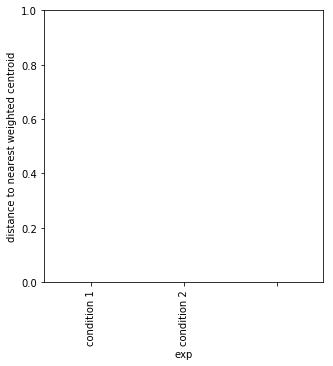

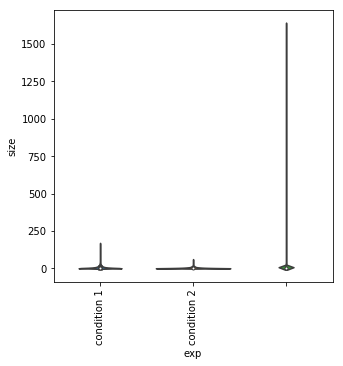

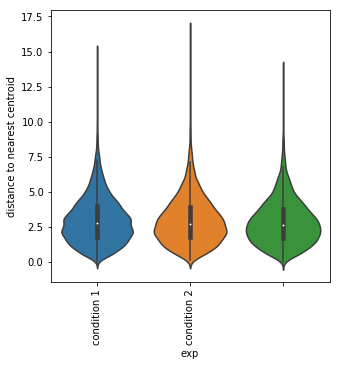

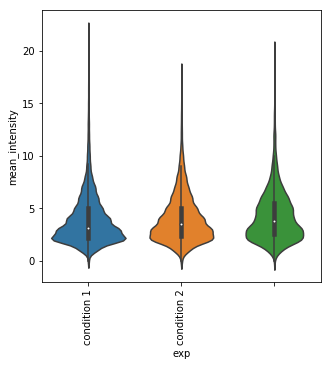

In [19]:
plt.figure(figsize=(5,5))
sns.violinplot(y="distance to nearest weighted centroid",x="exp",data=df_ecm)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.violinplot(y="size",x="exp",data=df_ecm)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.violinplot(y="distance to nearest centroid",x="exp",data=df_ecm)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.violinplot(y="mean_intensity",x="exp",data=df_ecm)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

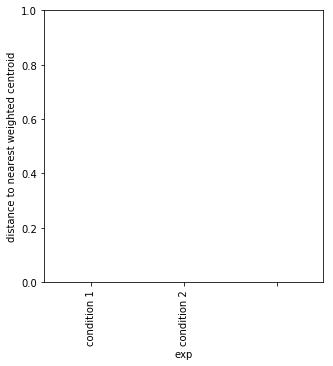

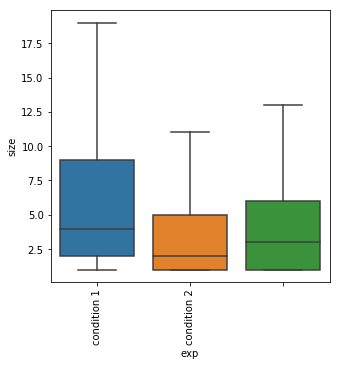

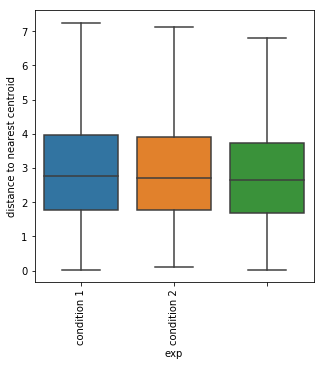

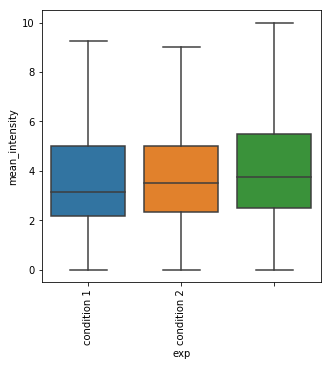

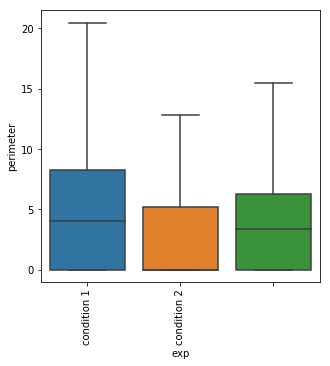

In [20]:
plt.figure(figsize=(5,5))
sns.boxplot(y="distance to nearest weighted centroid",x="exp",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.boxplot(y="size",x="exp",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.boxplot(y="distance to nearest centroid",x="exp",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.boxplot(y="mean_intensity",x="exp",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.boxplot(y="perimeter",x="exp",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

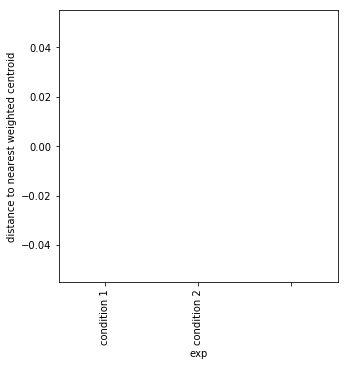

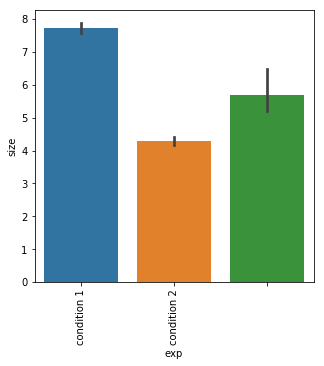

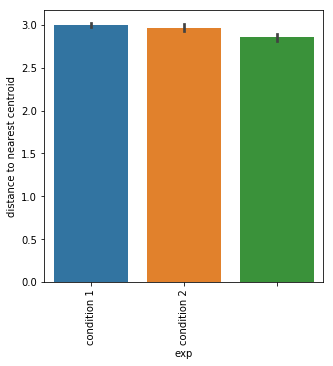

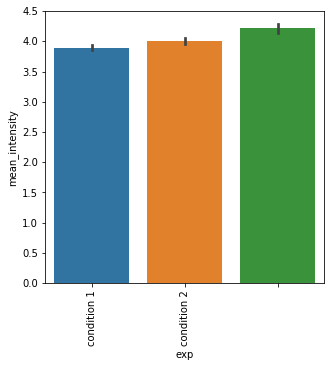

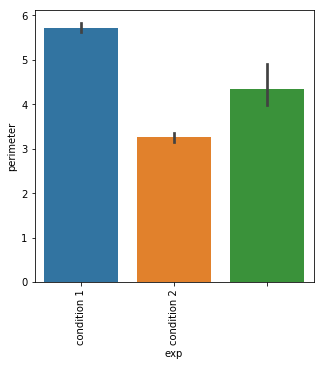

In [22]:
plt.figure(figsize=(5,5))
sns.barplot(y="distance to nearest weighted centroid",x="exp",data=df_ecm)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.barplot(y="size",x="exp",data=df_ecm)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.barplot(y="distance to nearest centroid",x="exp",data=df_ecm)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.barplot(y="mean_intensity",x="exp",data=df_ecm)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.barplot(y="perimeter",x="exp",data=df_ecm)
plt.xticks(rotation=90)